In [3]:

import pandas as pd

import numpy as np
import hashlib
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.preprocesar_asistencias_fusagasuga import agregar_bimestre_con_dias
from scripts.EDA_asistencia import hash_value,agrupar_por_estudiante_y_periodo,apply_index,analitica_descriptiva,graficos_analitica_descriptiva

In [4]:
df_imputado=pd.read_csv('asistencia_fusagasuga_2024-imputado.csv')
asistencia_df_trans = df_imputado.copy()
asistencia_df_trans.head(1)


,Mes,Grado,Año,estudiante,Día,Estado,Mes_Num,Grado_Num,Bimestre,Estado_Num,Sede,Antigüedad,Género,Documento de Identificación
0,Abril,Quinto,2024,AVILA GONZALEZ MARIANA,1,A,4,5,I,1.0,Fusagasugá,Antiguo,Femenino,1016960759


In [5]:
calificaciones_df_trans=pd.read_csv('notas/calificaciones_to_model_final.csv')
calificaciones_df_trans.head(1)

,Sede,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada,Grupo Asignatura
0,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,3.0,Ciencias Naturales,75,75,80,85.0,77.0,Ciencias y Matemáticas


2. anonimizacion de datos y eliminacion de columnas

In [6]:

asistencia_df_trans['Documento de Identificación'] = asistencia_df_trans['Documento de Identificación'].astype('str')
asistencia_df_trans['Documento_Hash'] = asistencia_df_trans['Documento de Identificación'].apply(hash_value)
asistencia_df_trans.drop(columns=['Documento de Identificación',"estudiante"], inplace=True)
asistencia_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26195 entries, 0 to 26194
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mes             26195 non-null  object 
 1   Grado           26195 non-null  object 
 2   Año             26195 non-null  int64  
 3   Día             26195 non-null  int64  
 4   Estado          26195 non-null  object 
 5   Mes_Num         26195 non-null  int64  
 6   Grado_Num       26195 non-null  int64  
 7   Bimestre        26195 non-null  object 
 8   Estado_Num      26195 non-null  float64
 9   Sede            26195 non-null  object 
 10  Antigüedad      26129 non-null  object 
 11  Género          26195 non-null  object 
 12  Documento_Hash  26195 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.6+ MB


1. transformacion de variables a categoricas

In [7]:
asistencia_df_trans['Año'] = asistencia_df_trans['Año'].astype('object')
asistencia_df_trans['Grado_Num'] = asistencia_df_trans['Grado_Num'].astype('object')
calificaciones_df_trans['Grado_Num'] = calificaciones_df_trans['Grado']
calificaciones_df_trans['Grado'] = calificaciones_df_trans['Grado'].astype('str')
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22045 entries, 0 to 22044
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    22045 non-null  object 
 1   Documento de identidad  22045 non-null  object 
 2   Grado                   22045 non-null  object 
 3   Grupo                   22045 non-null  object 
 4   Periodo                 22045 non-null  object 
 5   Año                     22045 non-null  int64  
 6   Intensidad Horaria      22045 non-null  float64
 7   Asignatura              22045 non-null  object 
 8   Cognitiva               22045 non-null  int64  
 9   Procedimental           22045 non-null  int64  
 10  Actitudinal             22045 non-null  int64  
 11  Axiologica              22045 non-null  float64
 12  Calificacion_Ponderada  22045 non-null  float64
 13  Grupo Asignatura        22045 non-null  object 
 14  Grado_Num               22045 non-null

In [8]:
asistencia_df_trans=agregar_bimestre_con_dias(asistencia_df_trans)

In [9]:
label_encoder = LabelEncoder()
asistencia_df_trans['Periodo_Num'] = label_encoder.fit_transform(asistencia_df_trans['Bimestre'])
asistencia_df_trans['Periodo_Num'] += 1

asistencia_df_trans[['Bimestre', 'Periodo_Num']].value_counts()

Bimestre  Periodo_Num
III       3              9576
I         1              8811
II        2              7808
Name: count, dtype: int64

In [10]:
label_encoder = LabelEncoder()
calificaciones_df_trans['Periodo_Num'] = label_encoder.fit_transform(calificaciones_df_trans['Periodo'])
calificaciones_df_trans['Periodo_Num'] += 1
calificaciones_df_trans[['Periodo', 'Periodo_Num']].value_counts()

Periodo  Periodo_Num
I        1              7405
II       2              7383
III      3              3633
IV       4              3624
Name: count, dtype: int64

In [11]:
asistencia_df_trans=apply_index(asistencia_df_trans)
calificaciones_df_trans=apply_index(calificaciones_df_trans)
asistencia_df_trans.head(1)



,Mes,Grado,Año,Día,Estado,Mes_Num,Grado_Num,Bimestre,Estado_Num,Sede,Antigüedad,Género,Documento_Hash,Periodo_Num
Fecha,,,,,,,,,,,,,,
2024-01-01,Abril,Quinto,2024,1,A,4,5,I,1.0,Fusagasugá,Antiguo,Femenino,887e1112588cb755430115586e5ddb20b7924e30575f1a...,1


In [86]:
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22045 entries, 2023-01-01 to 2024-02-01
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    22045 non-null  object 
 1   Documento de identidad  22045 non-null  object 
 2   Grado                   22045 non-null  object 
 3   Grupo                   22045 non-null  object 
 4   Periodo                 22045 non-null  object 
 5   Año                     22045 non-null  object 
 6   Intensidad Horaria      22045 non-null  float64
 7   Asignatura              22045 non-null  object 
 8   Cognitiva               22045 non-null  int64  
 9   Procedimental           22045 non-null  int64  
 10  Actitudinal             22045 non-null  int64  
 11  Axiologica              22045 non-null  float64
 12  Calificacion_Ponderada  22045 non-null  float64
 13  Grupo Asignatura        22045 non-null  object 
 14  Grado_Num            

Agrupar dataframe por esudiante con su promedio de asistencia

In [14]:
def agrupar_por_estudiante_y_periodo(df, columna_estado='estado'):
    """
    Agrupa un DataFrame por estudiante y período, calculando el promedio de asistencia
    y manteniendo otras columnas no agrupadas.

    Args:
        df (pd.DataFrame): DataFrame original con datos de estudiantes, períodos y estado.
        columna_estado (str): Nombre de la columna de la cual se calculará el promedio.

    Returns:
        pd.DataFrame: Nuevo DataFrame agrupado con el promedio de la columna especificada
                      y columnas adicionales conservadas.
    """
    # Verificar que las columnas necesarias existen
    columnas_requeridas = ['Documento_Hash', 'Periodo_Num', columna_estado]
    if not all(col in df.columns for col in columnas_requeridas):
        raise ValueError(f"El DataFrame debe contener las columnas: {columnas_requeridas}. "
                         f"Columnas encontradas: {list(df.columns)}")

    # Verificar si la columna_estado contiene valores numéricos
    if not pd.api.types.is_numeric_dtype(df[columna_estado]):
        raise ValueError(f"La columna '{columna_estado}' debe contener valores numéricos.")

    # Definir funciones de agregación para columnas adicionales
    agregaciones = {col: 'first' for col in df.columns if col not in ['Documento_Hash', 'Periodo_Num', columna_estado]}
    agregaciones[columna_estado] = 'mean'  # Agregar la operación para la columna de estado

    # Agrupar por estudiante y período, aplicando las operaciones
    nuevo_df = df.groupby(['Documento_Hash', 'Periodo_Num'], as_index=False).agg(agregaciones)

    return nuevo_df


In [15]:
asistencia_df_agrupado=asistencia_df_trans.copy()
asistencia_df_agrupado=agrupar_por_estudiante_y_periodo(asistencia_df_agrupado,"Estado_Num")

In [16]:
asistencia_df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Documento_Hash  368 non-null    object 
 1   Periodo_Num     368 non-null    object 
 2   Mes             368 non-null    object 
 3   Grado           368 non-null    object 
 4   Año             368 non-null    object 
 5   Día             368 non-null    int64  
 6   Estado          368 non-null    object 
 7   Mes_Num         368 non-null    int64  
 8   Grado_Num       368 non-null    object 
 9   Bimestre        368 non-null    object 
 10  Sede            368 non-null    object 
 11  Antigüedad      368 non-null    object 
 12  Género          368 non-null    object 
 13  Estado_Num      368 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 40.4+ KB


In [17]:
asistencia_df_agrupado.head()

,Documento_Hash,Periodo_Num,Mes,Grado,Año,Día,Estado,Mes_Num,Grado_Num,Bimestre,Sede,Antigüedad,Género,Estado_Num
0,009e68c1ed428526e2c4ce20a0bc94a36ac0907dbcca1e...,1,Abril,Sexto,2024,10,A,4,6,I,Fusagasugá,Nuevo,Femenino,0.986486
1,009e68c1ed428526e2c4ce20a0bc94a36ac0907dbcca1e...,2,Mayo,Sexto,2024,31,A,5,6,II,Fusagasugá,Nuevo,Femenino,1.000000
2,009e68c1ed428526e2c4ce20a0bc94a36ac0907dbcca1e...,3,Junio,Sexto,2024,28,A,6,6,III,Fusagasugá,Nuevo,Femenino,1.000000
3,031267d49c0a24286d425b7d12dc5608318416905621f7...,1,Marzo,Octavo,2024,9,A,3,8,I,Fusagasugá,Antiguo,Masculino,0.993243
4,031267d49c0a24286d425b7d12dc5608318416905621f7...,2,Mayo,Octavo,2024,31,A,5,8,II,Fusagasugá,Antiguo,Masculino,1.000000


In [18]:
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22045 entries, 2023-01-01 to 2024-02-01
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    22045 non-null  object 
 1   Documento de identidad  22045 non-null  object 
 2   Grado                   22045 non-null  object 
 3   Grupo                   22045 non-null  object 
 4   Periodo                 22045 non-null  object 
 5   Año                     22045 non-null  object 
 6   Intensidad Horaria      22045 non-null  float64
 7   Asignatura              22045 non-null  object 
 8   Cognitiva               22045 non-null  int64  
 9   Procedimental           22045 non-null  int64  
 10  Actitudinal             22045 non-null  int64  
 11  Axiologica              22045 non-null  float64
 12  Calificacion_Ponderada  22045 non-null  float64
 13  Grupo Asignatura        22045 non-null  object 
 14  Grado_Num            

In [19]:
calificaciones_df_trans["Documento_Hash"]=calificaciones_df_trans["Documento de identidad"]


In [23]:
def completar_calificaciones_con_asistencia_todas_columnas(df_calificaciones, df_asistencia, columna_estado='estado'):
    """
    Completa el DataFrame de calificaciones con los datos del DataFrame de asistencia,
    preservando todas las columnas de ambos DataFrames.

    Args:
        df_calificaciones (pd.DataFrame): DataFrame con las calificaciones de los estudiantes.
        df_asistencia (pd.DataFrame): DataFrame con los datos de asistencia de los estudiantes.
        columna_estado (str): Nombre de la columna de asistencia en df_asistencia.

    Returns:
        pd.DataFrame: DataFrame combinado con todas las columnas de ambos DataFrames.
    """
    # Verificar que las columnas clave existen en ambos DataFrames
    columnas_requeridas_asistencia = ['Documento_Hash', 'Periodo_Num', columna_estado]
    if not all(col in df_asistencia.columns for col in columnas_requeridas_asistencia):
        raise ValueError(f"El DataFrame de asistencia debe contener las columnas: {columnas_requeridas_asistencia}.")
    
    columnas_requeridas_calificaciones = ['Documento_Hash', 'Periodo_Num']
    if not all(col in df_calificaciones.columns for col in columnas_requeridas_calificaciones):
        raise ValueError(f"El DataFrame de calificaciones debe contener las columnas: {columnas_requeridas_calificaciones}.")
    
    # Realizar el merge para completar los valores
    df_combinado = pd.merge(
        df_calificaciones,
        df_asistencia,
        on=['Documento_Hash', 'Periodo_Num'],
        how='left'
    )
    
    return df_combinado


In [32]:
# Merge usando las columnas 'documento' y 'bimestre' como claves
df_combinado_asistencia_calificaciones = completar_calificaciones_con_asistencia_todas_columnas(calificaciones_df_trans, asistencia_df_agrupado, columna_estado='Estado_Num')
df_combinado_asistencia_calificaciones




,Sede_x,Documento de identidad,Grado_x,Grupo,Periodo,Año_x,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,...,Año_y,Día,Estado,Mes_Num,Grado_Num_y,Bimestre,Sede_y,Antigüedad,Género,Estado_Num
0,Fusagasugá,5db730fb0924b2de7d5e8c06eff3d6648f3b311683a3e3...,6,A,I,2023,3.0,Ciencias Naturales,77,77,...,2024,10.0,A,4.0,7,I,Fusagasugá,Antiguo,Masculino,0.993243
1,Girardot,9fa5185aac452b07a4dc99c2e9d5c4aca4ba12e880a1d7...,4,A,I,2023,3.0,Educación Física,88,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Girardot,9fa5185aac452b07a4dc99c2e9d5c4aca4ba12e880a1d7...,4,A,I,2023,4.0,Aprendizaje Basado en Proyectos,92,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Girardot,9fa5185aac452b07a4dc99c2e9d5c4aca4ba12e880a1d7...,4,A,I,2023,2.0,Creatividad e Innovación,93,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Girardot,9fa5185aac452b07a4dc99c2e9d5c4aca4ba12e880a1d7...,4,A,I,2023,4.0,Inglés,81,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22040,Fusagasugá,1f5cdb95efa305fbb356f1fa38356d745565ebfe6cadbc...,1,A,II,2024,5.0,Matemáticas,92,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22041,Fusagasugá,1f5cdb95efa305fbb356f1fa38356d745565ebfe6cadbc...,1,A,II,2024,3.0,Lengua Castellana,95,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22042,Fusagasugá,1f5cdb95efa305fbb356f1fa38356d745565ebfe6cadbc...,1,A,II,2024,2.0,Lectura Crítica,91,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22043,Girardot,e39160aba2d390f112f423c2abe0bc71afd1e6f97c12c4...,5,A,II,2024,2.0,Aprendizaje Basado en Proyectos,84,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones[df_combinado_asistencia_calificaciones["Año_x"] != '2023']
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones[df_combinado_asistencia_calificaciones["Sede_x"] != 'Girardot']
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones.drop("Mes_Num", axis=1)



In [ ]:
df_combinado_asistencia_calificaciones['Estado_Num'] = df_combinado_asistencia_calificaciones['Estado_Num'].fillna(df_combinado_asistencia_calificaciones['Estado_Num'].median())
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones.drop("Mes", axis=1)
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones.drop("Grado_y", axis=1)
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones.drop("Año_y", axis=1)

In [ ]:
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones.drop("Grado_Num_y", axis=1)
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones.drop("Día", axis=1)
df_combinado_asistencia_calificaciones = df_combinado_asistencia_calificaciones.drop("Sede_y", axis=1)
df_combinado_asistencia_calificaciones.to_csv('merge_calificacion_asistencia_fusa_2024_.csv', index=False)

2. analisis expliratorio

In [54]:
df_combinado_asistencia_calificaciones.describe()

,Intensidad Horaria,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada,Grado_Num_x,Estado_Num
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,2.619952,84.526086,84.499236,88.092993,89.794150,85.758219,5.976861,0.983773
std,1.500607,9.906221,10.426738,8.896228,8.611494,8.734378,3.012476,0.018259
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.867188
25%,1.000000,80.000000,79.000000,85.000000,87.000000,81.600000,4.000000,0.984375
50%,2.000000,87.000000,87.000000,90.000000,90.000000,87.800000,6.000000,0.986486
75%,4.000000,91.000000,92.000000,94.000000,95.000000,91.600000,9.000000,0.993243
max,7.000000,100.000000,100.000000,100.000000,100.000000,100.000000,11.000000,1.000000


In [55]:
df_combinado_asistencia_calificaciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4581 entries, 14631 to 22042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede_x                  4581 non-null   object 
 1   Documento de identidad  4581 non-null   object 
 2   Grado_x                 4581 non-null   object 
 3   Grupo                   4581 non-null   object 
 4   Periodo                 4581 non-null   object 
 5   Año_x                   4581 non-null   object 
 6   Intensidad Horaria      4581 non-null   float64
 7   Asignatura              4581 non-null   object 
 8   Cognitiva               4581 non-null   int64  
 9   Procedimental           4581 non-null   int64  
 10  Actitudinal             4581 non-null   int64  
 11  Axiologica              4581 non-null   float64
 12  Calificacion_Ponderada  4581 non-null   float64
 13  Grupo Asignatura        4581 non-null   object 
 14  Grado_Num_x             4581 non-null   

<Axes: >

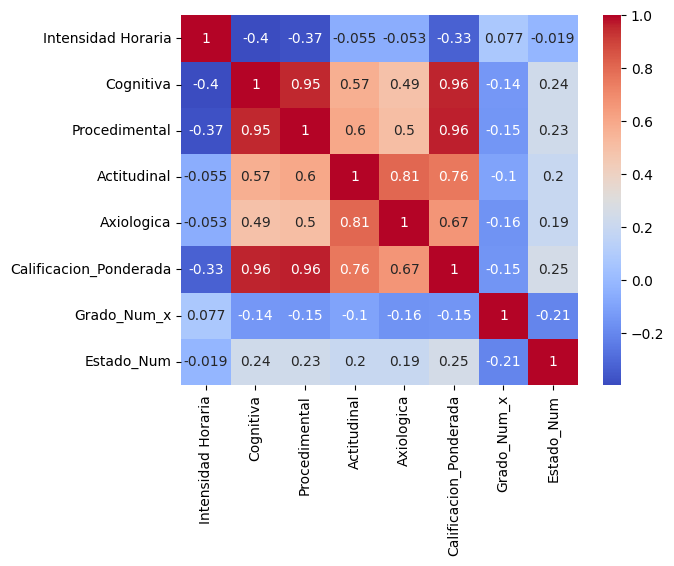

In [59]:
import seaborn as sns
df_numeric = df_combinado_asistencia_calificaciones.select_dtypes(include=['number'])

sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")

Analizar correlación categórica separadamente
Si tus datos categóricos no tienen un significado numérico directo, podrías usar métricas específicas para medir correlación categórica (por ejemplo, Cramér’s V).

Aquí tienes un ejemplo de cómo calcular una correlación mixta entre variables numéricas y categóricas usando Cramér's V para las categóricas y Pearson para las numéricas.

C:\Users\Cathe\AppData\Local\Temp\ipykernel_17672\373089456.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r - 1, k - 1))
C:\Users\Cathe\AppData\Local\Temp\ipykernel_17672\373089456.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r - 1, k - 1))
C:\Users\Cathe\AppData\Local\Temp\ipykernel_17672\373089456.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r - 1, k - 1))
C:\Users\Cathe\AppData\Local\Temp\ipykernel_17672\373089456.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r - 1, k - 1))
C:\Users\Cathe\AppData\Local\Temp\ipykernel_17672\373089456.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r - 1, k - 1))
C:\Users\Cathe\AppData\Local\Temp\ipykernel_17672\373089456.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r

<Axes: >

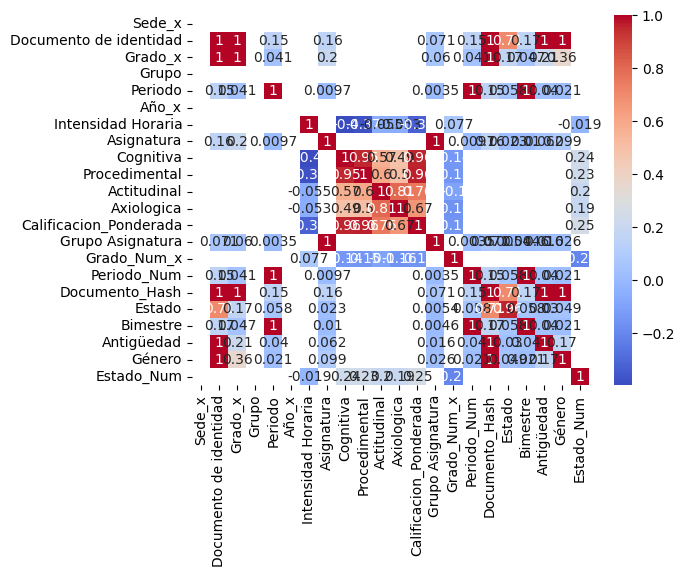

In [65]:
from scipy.stats import chi2_contingency
import numpy as np

# Función para calcular Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Crear matriz de correlaciones mixta
correlation_matrix = pd.DataFrame(index=df_combinado_asistencia_calificaciones.columns, columns=df_combinado_asistencia_calificaciones.columns)

for col1 in df_combinado_asistencia_calificaciones.columns:
    for col2 in df_combinado_asistencia_calificaciones.columns:
        if df_combinado_asistencia_calificaciones[col1].dtype == 'object' or df_combinado_asistencia_calificaciones[col2].dtype == 'object':
            correlation_matrix.loc[col1, col2] = cramers_v(df_combinado_asistencia_calificaciones[col1], df_combinado_asistencia_calificaciones[col2]) if df_combinado_asistencia_calificaciones[col1].dtype == 'object' and df_combinado_asistencia_calificaciones[col2].dtype == 'object' else np.nan
        else:
            correlation_matrix.loc[col1, col2] = df_combinado_asistencia_calificaciones[col1].corr(df_combinado_asistencia_calificaciones[col2])

# Visualizar la matriz
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap="coolwarm")



In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

def analisis_bivariado(df, col1, col2):
    """
    Realiza un análisis bivariado entre dos columnas de un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    col1 (str): El nombre de la primera columna.
    col2 (str): El nombre de la segunda columna.
    
    Retorno:
    None: Imprime gráficos y resultados del análisis.
    """
    tipo1 = df[col1].dtype
    tipo2 = df[col2].dtype

    print(f"Análisis entre {col1} ({tipo1}) y {col2} ({tipo2}):")
    print("=" * 50)
    
    # Caso 1: Ambas columnas son numéricas
    if pd.api.types.is_numeric_dtype(tipo1) and pd.api.types.is_numeric_dtype(tipo2):
        # Scatter plot
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f"Gráfico de dispersión: {col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()
        
        # Correlación
        pearson_corr = df[col1].corr(df[col2], method='pearson')
        spearman_corr = df[col1].corr(df[col2], method='spearman')
        print(f"Correlación de Pearson: {pearson_corr:.2f}")
        print(f"Correlación de Spearman: {spearman_corr:.2f}")
    
    # Caso 2: Ambas columnas son categóricas
    elif pd.api.types.is_object_dtype(tipo1) and pd.api.types.is_object_dtype(tipo2):
        # Tabla de contingencia
        tabla = pd.crosstab(df[col1], df[col2])
        sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f"Tabla de contingencia: {col1} vs {col2}")
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.show()
        
        # Prueba de Chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(tabla)
        print(f"Chi-cuadrado: {chi2:.2f}, p-valor: {p:.4f}")
        if p < 0.05:
            print("Conclusión: Existe asociación significativa entre las variables.")
        else:
            print("Conclusión: No hay evidencia suficiente de asociación significativa.")
    
    # Caso 3: Una columna numérica y otra categórica
    elif (pd.api.types.is_numeric_dtype(tipo1) and pd.api.types.is_object_dtype(tipo2)) or \
         (pd.api.types.is_object_dtype(tipo1) and pd.api.types.is_numeric_dtype(tipo2)):
        
        # Asegurar que la categórica es `col2` para simplificar el análisis
        if pd.api.types.is_numeric_dtype(tipo1):
            col_num, col_cat = col1, col2
        else:
            col_num, col_cat = col2, col1
        
        # Gráfico de cajas
        sns.boxplot(x=df[col_cat], y=df[col_num])
        plt.title(f"Distribución de {col_num} por categorías de {col_cat}")
        plt.xlabel(col_cat)
        plt.ylabel(col_num)
        plt.grid(True)
        plt.show()
        
        # Prueba ANOVA
        categorias = [df[col_num][df[col_cat] == cat] for cat in df[col_cat].dropna().unique()]
        f_stat, p_val = f_oneway(*categorias)
        print(f"F-stat: {f_stat:.2f}, p-valor: {p_val:.4f}")
        if p_val < 0.05:
            print("Conclusión: Existen diferencias significativas entre los grupos.")
        else:
            print("Conclusión: No hay evidencia de diferencias significativas entre los grupos.")
    
    else:
        print("El análisis bivariado no está soportado para los tipos seleccionados.")

# Ejemplo de uso
# analisis_bivariado(df, 'Intensidad Horaria', 'Estado')


Análisis entre Calificacion_Ponderada (float64) y Grupo Asignatura (object):


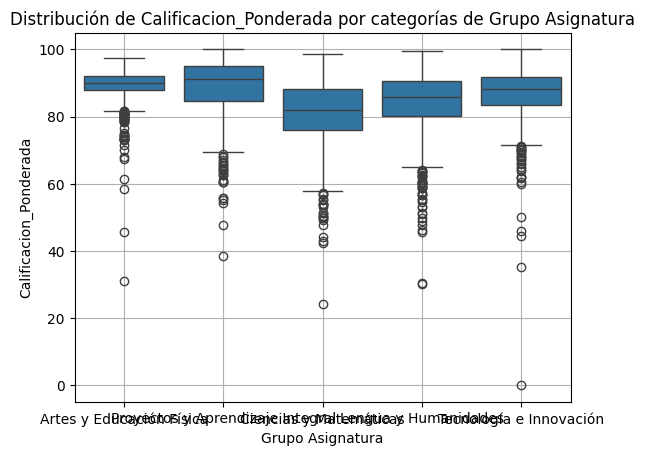

F-stat: 146.86, p-valor: 0.0000
Conclusión: Existen diferencias significativas entre los grupos.
Análisis entre Estado_Num (float64) y Bimestre (object):


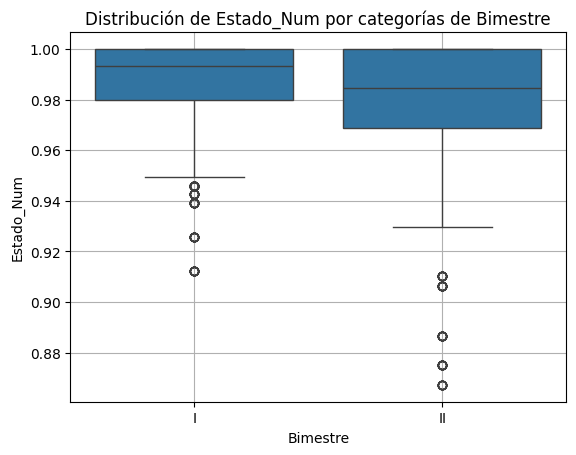

F-stat: 76.51, p-valor: 0.0000
Conclusión: Existen diferencias significativas entre los grupos.
Análisis entre Estado_Num (float64) y Calificacion_Ponderada (float64):


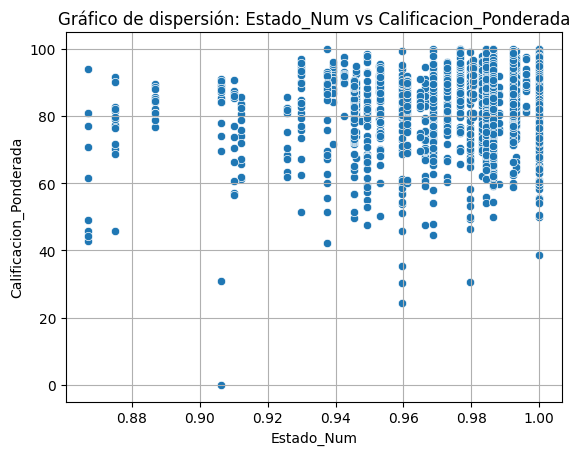

Correlación de Pearson: 0.25
Correlación de Spearman: 0.16
Análisis entre Calificacion_Ponderada (float64) y Grado_Num_x (int64):


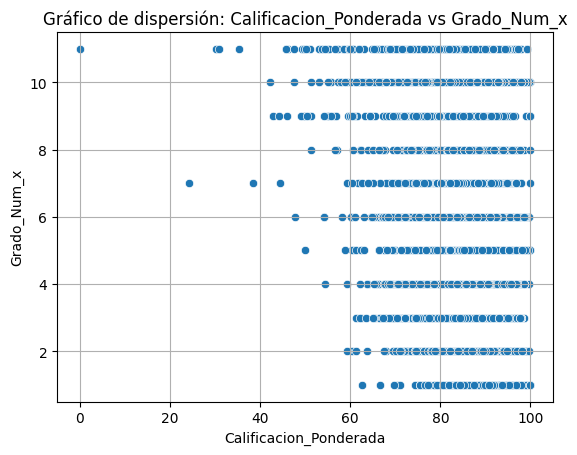

Correlación de Pearson: -0.15
Correlación de Spearman: -0.12
Análisis entre Calificacion_Ponderada (float64) y Intensidad Horaria (float64):


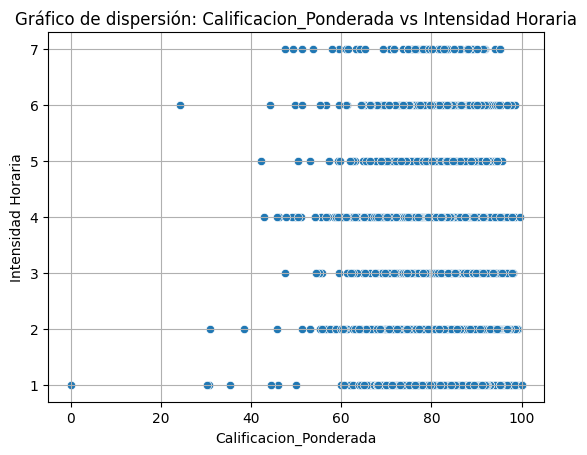

Correlación de Pearson: -0.33
Correlación de Spearman: -0.35


In [71]:
analisis_bivariado(df_combinado_asistencia_calificaciones, 'Calificacion_Ponderada', 'Grupo Asignatura')
analisis_bivariado(df_combinado_asistencia_calificaciones, 'Estado_Num', 'Bimestre')
analisis_bivariado(df_combinado_asistencia_calificaciones, 'Estado_Num', 'Calificacion_Ponderada')
analisis_bivariado(df_combinado_asistencia_calificaciones, 'Calificacion_Ponderada', 'Grado_Num_x')
analisis_bivariado(df_combinado_asistencia_calificaciones, 'Calificacion_Ponderada', 'Intensidad Horaria')

ANOVA

In [74]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def realizar_anova(df):
    """
    Realiza ANOVA para todas las combinaciones de variables numéricas y categóricas en un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    """
    # Separar las variables numéricas y categóricas
    numericas = df.select_dtypes(include=['float64', 'int64']).columns
    categoricas = df.select_dtypes(include=['object']).columns
    
    # Iterar sobre todas las combinaciones posibles
    for var_num in numericas:
        for var_cat in categoricas:
            # Comprobar si la variable categórica tiene más de un valor único
            if df[var_cat].nunique() > 1:
                # Agrupar por las categorías
                categorias = [df[var_num][df[var_cat] == cat] for cat in df[var_cat].dropna().unique()]
                
                # Realizar ANOVA
                f_stat, p_val = stats.f_oneway(*categorias)
                
                # Imprimir resultados
                print(f"Análisis ANOVA: {var_num} vs {var_cat}")
                print(f"F-Estadístico: {f_stat:.2f}")
                print(f"P-Valor: {p_val:.4f}")
                
                if p_val < 0.05:
                    print("Conclusión: Hay diferencias significativas entre los grupos.")
                else:
                    print("Conclusión: No hay diferencias significativas entre los grupos.")
                
                # Graficar Boxplot
                #plt.figure(figsize=(8, 6))
                #sns.boxplot(x=df[var_cat], y=df[var_num])
                #plt.title(f"Distribución de {var_num} por {var_cat}")
                #plt.xlabel(var_cat)
                #plt.ylabel(var_num)
                #plt.grid(True)
                #plt.show()
                
                print("=" * 50)


In [75]:
realizar_anova(df_combinado_asistencia_calificaciones)

Análisis ANOVA: Intensidad Horaria vs Documento de identidad
F-Estadístico: 0.17
P-Valor: 1.0000
Conclusión: No hay diferencias significativas entre los grupos.
Análisis ANOVA: Intensidad Horaria vs Grado_x
F-Estadístico: 3.28
P-Valor: 0.0003
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Intensidad Horaria vs Periodo
F-Estadístico: 0.00
P-Valor: 0.9653
Conclusión: No hay diferencias significativas entre los grupos.
Análisis ANOVA: Intensidad Horaria vs Asignatura
F-Estadístico: 5728.38
P-Valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Intensidad Horaria vs Grupo Asignatura
F-Estadístico: 2789.85
P-Valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Intensidad Horaria vs Periodo_Num
F-Estadístico: 0.00
P-Valor: 0.9653
Conclusión: No hay diferencias significativas entre los grupos.
Análisis ANOVA: Intensidad Horaria vs Documento_Hash
F-Estadístico: 0.17
P-Valor: 1.0000
Conclus

C:\Users\Cathe\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Análisis ANOVA: Estado_Num vs Documento de identidad
F-Estadístico: 55.90
P-Valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Estado_Num vs Grado_x
F-Estadístico: 40.28
P-Valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Estado_Num vs Periodo
F-Estadístico: 76.74
P-Valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Estado_Num vs Asignatura
F-Estadístico: 2.57
P-Valor: 0.0005
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Estado_Num vs Grupo Asignatura
F-Estadístico: 0.39
P-Valor: 0.8137
Conclusión: No hay diferencias significativas entre los grupos.
Análisis ANOVA: Estado_Num vs Periodo_Num
F-Estadístico: 76.74
P-Valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos.
Análisis ANOVA: Estado_Num vs Documento_Hash
F-Estadístico: 55.90
P-Valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos.
Análisis 

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def realizar_anova2(df):
    """
    Realiza ANOVA para todas las combinaciones de variables numéricas y categóricas en un DataFrame y
    guarda los resultados en un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    
    Retorna:
    pd.DataFrame: DataFrame con los resultados del ANOVA (F-Estadístico, P-Valor y Conclusión).
    """
    # Crear una lista para almacenar los resultados
    resultados = []
    
    # Separar las variables numéricas y categóricas
    numericas = df.select_dtypes(include=['float64', 'int64']).columns
    categoricas = df.select_dtypes(include=['object']).columns
    
    # Iterar sobre todas las combinaciones posibles
    for var_num in numericas:
        for var_cat in categoricas:
            # Comprobar si la variable categórica tiene más de un valor único y que no tenga valores nulos
            if df[var_cat].nunique() > 1 and df[var_cat].dropna().nunique() > 1:
                # Agrupar por las categorías, excluyendo valores nulos
                categorias = [df[var_num][df[var_cat] == cat].dropna() for cat in df[var_cat].dropna().unique()]
                
                try:
                    # Realizar ANOVA
                    f_stat, p_val = stats.f_oneway(*categorias)
                    
                    # Determinar conclusión
                    if p_val < 0.05:
                        conclusion = "Hay diferencias significativas entre los grupos."
                    else:
                        conclusion = "No hay diferencias significativas entre los grupos."
                    
                    # Guardar el resultado en la lista
                    resultados.append({
                        'Variable Numérica': var_num,
                        'Variable Categórica': var_cat,
                        'F-Estadístico': f_stat,
                        'P-Valor': p_val,
                        'Conclusión': conclusion
                    })
                    
                    
                
                except Exception as e:
                    # Si ocurre un error, guardar el mensaje de error
                    resultados.append({
                        'Variable Numérica': var_num,
                        'Variable Categórica': var_cat,
                        'F-Estadístico': None,
                        'P-Valor': None,
                        'Conclusión': f"Error: {e}"
                    })
                    
                print("=" * 50)
    
    # Convertir la lista de resultados en un DataFrame
    resultados_df = pd.DataFrame(resultados)
    
    return resultados_df


In [85]:
resultados_df = realizar_anova2(df_combinado_asistencia_calificaciones)

resultados_df = resultados_df[resultados_df["Conclusión"] != "No hay diferencias significativas entre los grupos."]
resultados_df.head(30)

C:\Users\Cathe\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Variable Numérica,Variable Categórica,F-Estadístico,P-Valor,Conclusión
1,Intensidad Horaria,Grado_x,3.276061,3.091582e-04,Hay diferencias significativas entre los grupos.
3,Intensidad Horaria,Asignatura,5728.381701,0.000000e+00,Hay diferencias significativas entre los grupos.
4,Intensidad Horaria,Grupo Asignatura,2789.847262,0.000000e+00,Hay diferencias significativas entre los grupos.
11,Cognitiva,Documento de identidad,10.250631,1.040954e-233,Hay diferencias significativas entre los grupos.
12,Cognitiva,Grado_x,22.020814,1.051501e-40,Hay diferencias significativas entre los grupos.
13,Cognitiva,Periodo,16.595390,4.704585e-05,Hay diferencias significativas entre los grupos.
14,Cognitiva,Asignatura,81.677018,5.040766e-235,Hay diferencias significativas entre los grupos.
15,Cognitiva,Grupo Asignatura,213.641845,2.652976e-168,Hay diferencias significativas entre los grupos.
16,Cognitiva,Periodo_Num,16.595390,4.704585e-05,Hay diferencias significativas entre los grupos.
17,Cognitiva,Documento_Hash,10.250631,1.040954e-233,Hay diferencias significativas entre los grupos.
